<a href="https://colab.research.google.com/github/SagayaAmalRaj/SagayaAmalRaj/blob/main/Copy_of_Copy_of_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
class_names = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['/content/drive/MyDrive/amal/foodminist/train', '/content/drive/MyDrive/amal/foodminist/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  4%|▍         | 16/375 [00:00<00:02, 157.56it/s]

Loading /content/drive/MyDrive/amal/foodminist/train


100%|██████████| 375/375 [01:28<00:00,  4.26it/s]


Loading /content/drive/MyDrive/amal/foodminist/test


100%|██████████| 125/125 [00:30<00:00,  4.10it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 3750
Number of testing examples: 1250
Each image is of size: (150, 150)


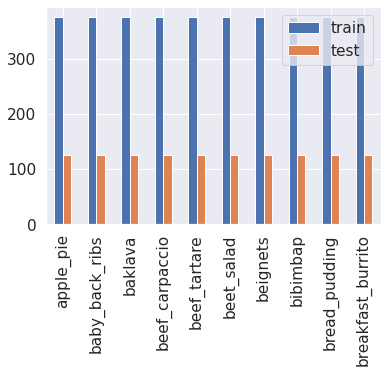

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

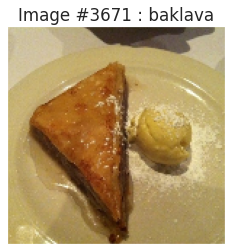

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(18,18))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

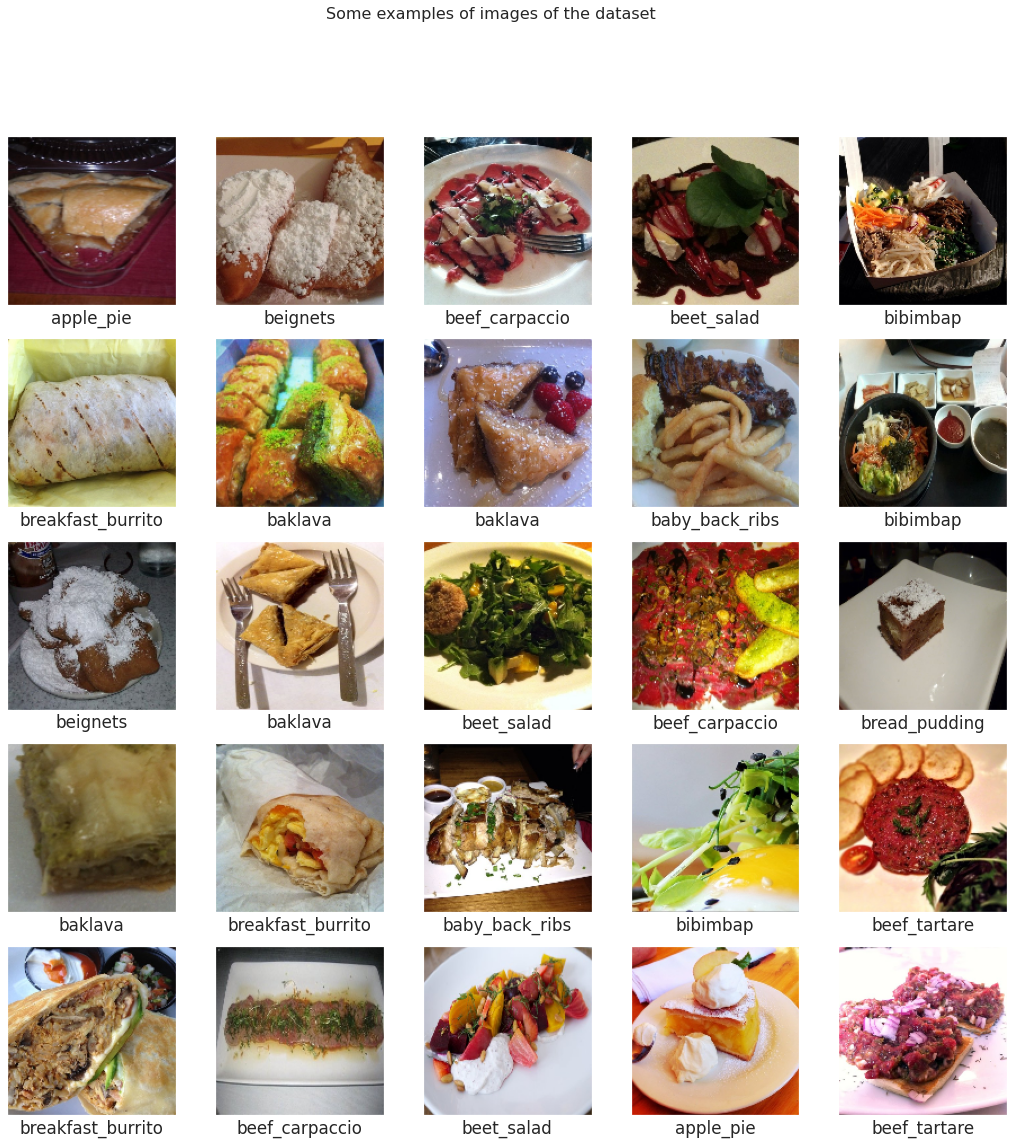

In [13]:
display_examples(class_names, train_images, train_labels)

In [14]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import pandas_profiling

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=100, validation_split = 0.2)
model.save("/content/drive/MyDrive/amal/raj")

Epoch 1/100
24/24 [==============================] - 36s 130ms/step - loss: 3.1270 - accuracy: 0.1258 - val_loss: 2.1181 - val_accuracy: 0.2267
Epoch 2/100
24/24 [==============================] - 2s 82ms/step - loss: 2.0826 - accuracy: 0.2561 - val_loss: 1.9799 - val_accuracy: 0.2920
Epoch 3/100
24/24 [==============================] - 2s 83ms/step - loss: 1.8794 - accuracy: 0.3546 - val_loss: 1.9086 - val_accuracy: 0.3067
Epoch 4/100
24/24 [==============================] - 2s 83ms/step - loss: 1.6608 - accuracy: 0.4377 - val_loss: 1.8829 - val_accuracy: 0.3347
Epoch 5/100
24/24 [==============================] - 2s 81ms/step - loss: 1.3784 - accuracy: 0.5444 - val_loss: 1.9392 - val_accuracy: 0.3520
Epoch 6/100
24/24 [==============================] - 2s 82ms/step - loss: 1.0610 - accuracy: 0.6710 - val_loss: 2.0209 - val_accuracy: 0.3387
Epoch 7/100
24/24 [==============================] - 2s 83ms/step - loss: 0.7904 - accuracy: 0.7870 - val_loss: 2.1761 - val_accuracy: 0.3120
Epoc

In [18]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
40/40 [==============================] - 0s 8ms/step - loss: 6.2728 - accuracy: 0.3088
Test Accuracy: 30.880001187324524


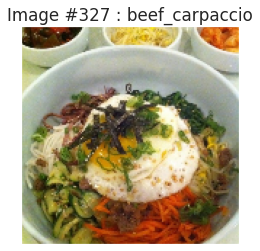

In [20]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [21]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

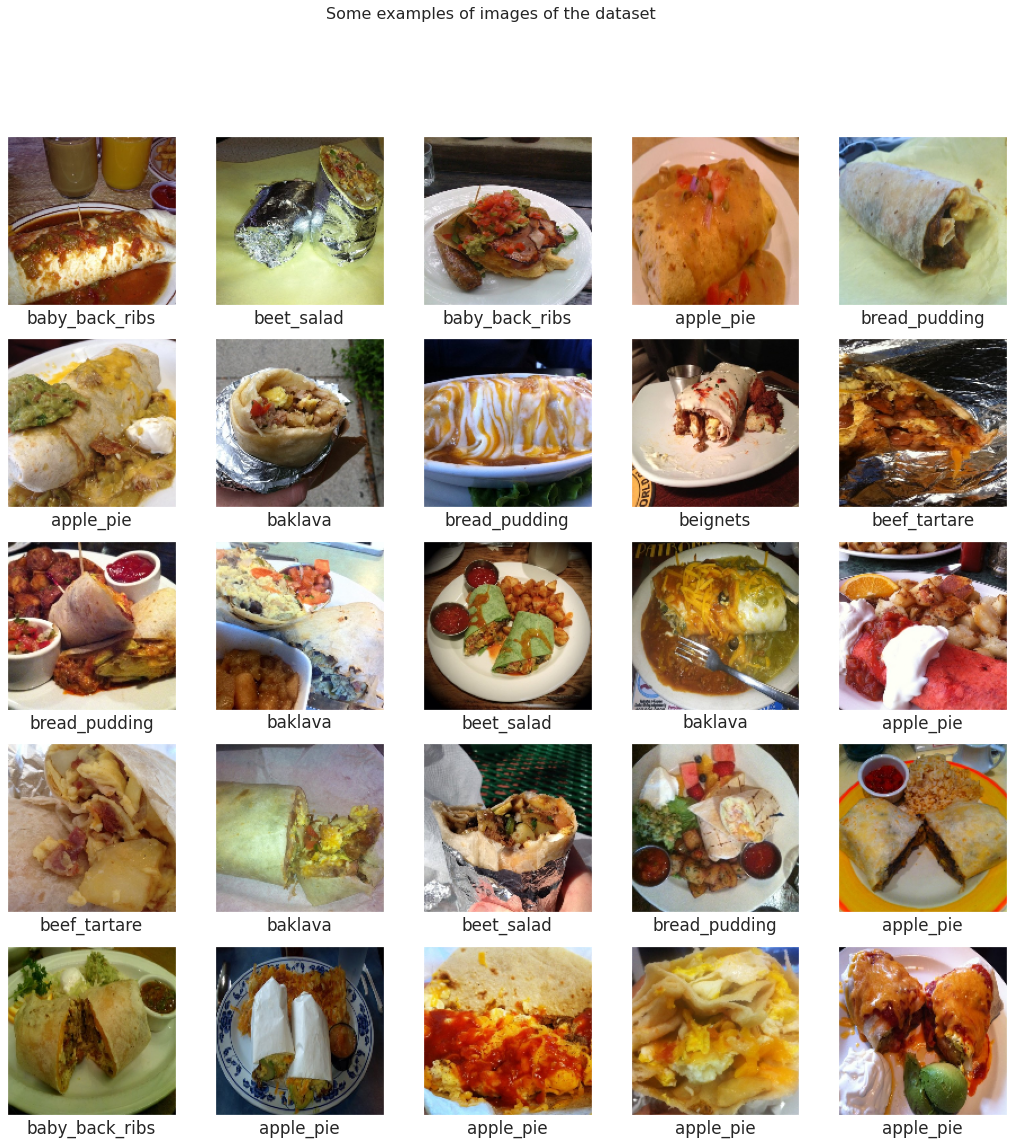

In [22]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [23]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels, pred_labels)
print(matrix)

[[19  2 32  0 11  3  8  8 27 15]
 [ 7 47  3 11 16 16  6  2 14  3]
 [22  3 42  1 12  3 12  5 12 13]
 [ 5 12  6 43 17 15  5  5 11  6]
 [ 8 12 10 10 30 17  5  8 16  9]
 [ 4 10  7 19 18 31  7  9 11  9]
 [10  2  4  1  6  3 64  5 18 12]
 [10  4  3 11  1 13  2 65  6 10]
 [15  9 20  8 12 12 10  7 22 10]
 [25 11 20  9  7  7  4  2 17 23]]


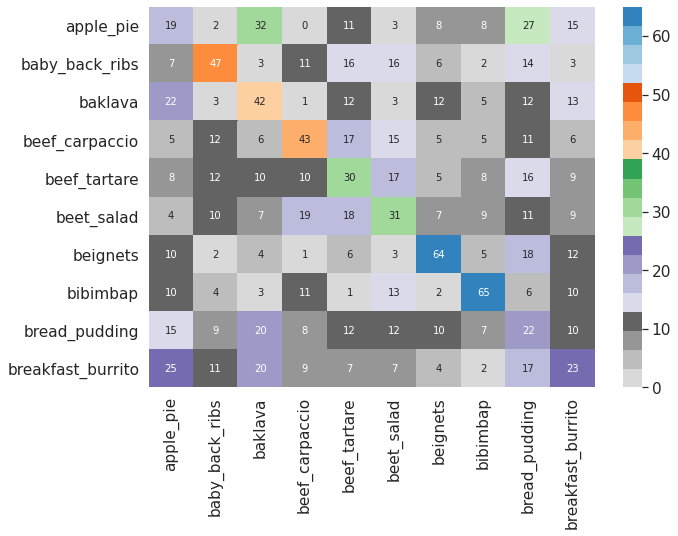

In [24]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
l.sort()
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d", cmap="tab20c_r")
plt.savefig('/content/drive/MyDrive/amal/foodminist/test/beef_carpaccio/100853.jpg',dpi = 100)
plt.show()

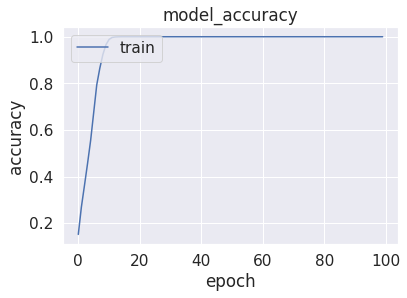

In [25]:
plt.plot(history.history['accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

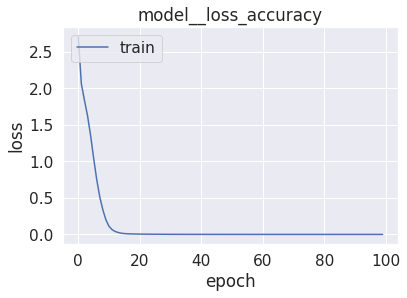

In [26]:
plt.plot(history.history['loss'])
plt.title('model__loss_accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

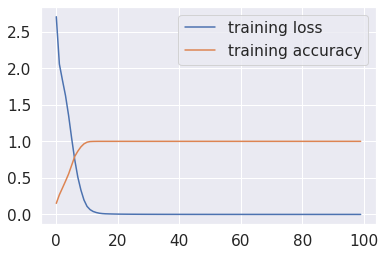

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

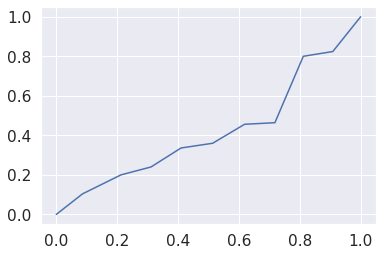

AUC: 0.4197333333333333


In [28]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

test_labels, pred_labels 
fpr, tpr, thresholds = metrics.roc_curve(test_labels, pred_labels, pos_label=2)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [29]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels, pred_labels)
print(matrix)

[[19  2 32  0 11  3  8  8 27 15]
 [ 7 47  3 11 16 16  6  2 14  3]
 [22  3 42  1 12  3 12  5 12 13]
 [ 5 12  6 43 17 15  5  5 11  6]
 [ 8 12 10 10 30 17  5  8 16  9]
 [ 4 10  7 19 18 31  7  9 11  9]
 [10  2  4  1  6  3 64  5 18 12]
 [10  4  3 11  1 13  2 65  6 10]
 [15  9 20  8 12 12 10  7 22 10]
 [25 11 20  9  7  7  4  2 17 23]]


In [30]:
import numpy as np

cm = np.array(
[[24, 6, 34,  3, 11,  3,  7,  6, 22,  9],
 [ 2, 37,  5, 12, 24, 15,  6,  6, 12,  6],
 [20,  4, 45,  4,  7,  4, 13,  7, 11, 10],
 [ 4,  9,  5, 45, 14, 19,  8,  5,  9,  7],
 [ 9, 13, 13,  7, 27, 20,  7,  7, 17,  5],
 [ 0, 12, 10, 17, 12, 34, 10, 10, 12,  8],
 [ 4,  0,  4,  4,  6,  5, 66,  7, 21,  8],
 [ 5,  5,  3,  5,  4, 18,  3, 72,  4,  6],
 [14,  8, 18,  3, 14, 18,  6, 11, 26,  7],
 [16, 10, 19, 11,  7,  9,  5,  7, 15, 26]])

In [31]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_labels, pred_labels, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(test_labels, pred_labels, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_labels))]
p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)

In [32]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

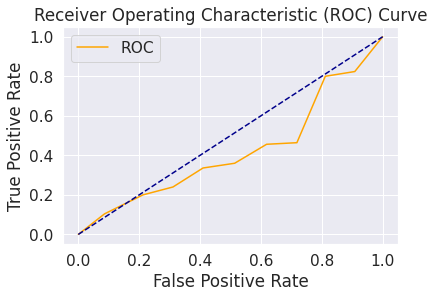

In [33]:
plot_roc_curve(fpr, tpr)

In [34]:
#feature extraction

In [35]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [36]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [37]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [38]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

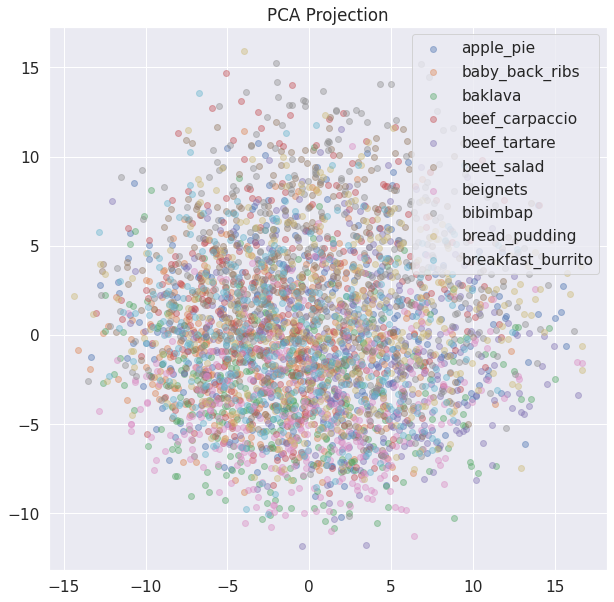

In [39]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [40]:
# Training on top of VGG

In [41]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=30, validation_split = 0.2)
model2.save("/content/drive/MyDrive/amal/raj/raj1_top1vgg.hdf5")

Epoch 1/30
24/24 [==============================] - 1s 11ms/step - loss: 2.3703 - accuracy: 0.2121 - val_loss: 1.6424 - val_accuracy: 0.4253
Epoch 2/30
24/24 [==============================] - 0s 6ms/step - loss: 1.4018 - accuracy: 0.5254 - val_loss: 1.4708 - val_accuracy: 0.4773
Epoch 3/30
24/24 [==============================] - 0s 6ms/step - loss: 1.0885 - accuracy: 0.6540 - val_loss: 1.3965 - val_accuracy: 0.5187
Epoch 4/30
24/24 [==============================] - 0s 6ms/step - loss: 0.8982 - accuracy: 0.7264 - val_loss: 1.3153 - val_accuracy: 0.5547
Epoch 5/30
24/24 [==============================] - 0s 6ms/step - loss: 0.7412 - accuracy: 0.8027 - val_loss: 1.3152 - val_accuracy: 0.5493
Epoch 6/30
24/24 [==============================] - 0s 6ms/step - loss: 0.6669 - accuracy: 0.8274 - val_loss: 1.3229 - val_accuracy: 0.5440
Epoch 7/30
24/24 [==============================] - 0s 6ms/step - loss: 0.5543 - accuracy: 0.8828 - val_loss: 1.3063 - val_accuracy: 0.5573
Epoch 8/30
24/24 [=

In [42]:
test_loss = model2.evaluate(test_features, test_labels)

40/40 [==============================] - 0s 2ms/step - loss: 1.6679 - accuracy: 0.5552


In [43]:
#Ensemble Neural Networks

In [44]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [45]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [46]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 2.3677 - accuracy: 0.2252 - val_loss: 1.5093 - val_accuracy: 0.5100
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 1.2784 - accuracy: 0.5927 - val_loss: 1.3182 - val_accuracy: 0.5833
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.8665 - accuracy: 0.7572 - val_loss: 1.0975 - val_accuracy: 0.6900
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6348 - accuracy: 0.8455 - val_loss: 0.9777 - val_accuracy: 0.7200
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4821 - accuracy: 0.9031 - val_loss: 1.0095 - val_accuracy: 0.7033
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3796 - accuracy: 0.9279 - val_loss: 0.9249 - val_accuracy: 0.7200
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.9420 - val_loss: 0.8374 - val_accuracy: 0.7600
Epoch 8/10
22/22 [=

In [47]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [48]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.58


In [49]:
#Fine Tuning VGG ImageNet

In [50]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [51]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [52]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) 
layer_input = Input(shape = (9, 9, 512)) 
x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(20,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [53]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 9, 9, 512)]       0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0   

In [55]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
24/24 [==============================] - 4s 120ms/step - loss: 2.8128 - accuracy: 0.1075 - val_loss: 2.0916 - val_accuracy: 0.2347
Epoch 2/10
24/24 [==============================] - 2s 69ms/step - loss: 2.0885 - accuracy: 0.2274 - val_loss: 1.7357 - val_accuracy: 0.3653
Epoch 3/10
24/24 [==============================] - 2s 70ms/step - loss: 1.7204 - accuracy: 0.3806 - val_loss: 1.5333 - val_accuracy: 0.4093
Epoch 4/10
24/24 [==============================] - 2s 71ms/step - loss: 1.4265 - accuracy: 0.4887 - val_loss: 1.5023 - val_accuracy: 0.4760
Epoch 5/10
24/24 [==============================] - 2s 71ms/step - loss: 1.2265 - accuracy: 0.5711 - val_loss: 1.2800 - val_accuracy: 0.5627
Epoch 6/10
24/24 [==============================] - 2s 71ms/step - loss: 0.9456 - accuracy: 0.6808 - val_loss: 1.2996 - val_accuracy: 0.5587
Epoch 7/10
24/24 [==============================] - 2s 71ms/step - loss: 0.8060 - accuracy: 0.7288 - val_loss: 1.3455 - val_accuracy: 0.5827
Epoch 8/10
2

In [56]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.5704


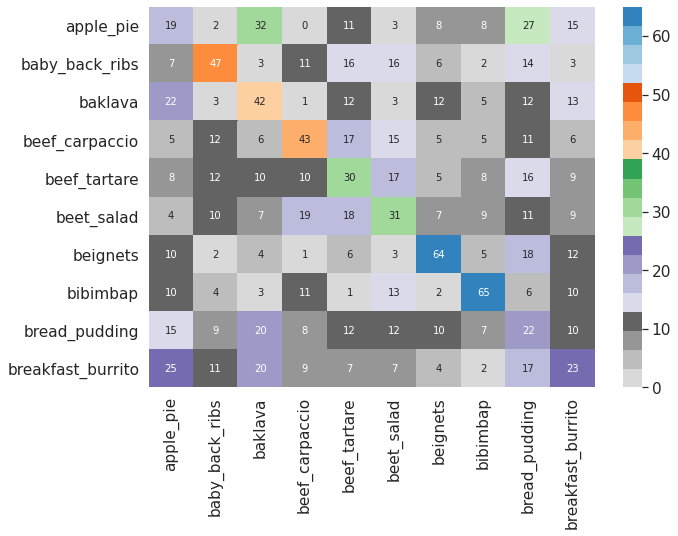

In [57]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l =  ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
l.sort()
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d", cmap="tab20c_r")
plt.savefig('/content/drive/MyDrive/amal/figure.png',dpi = 100)
plt.show()